# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
import os

import datetime
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

import re
import pickle
from sklearn.model_selection import train_test_split

## After Preprocessing

## Reading Data

In [2]:
project_data = pd.read_csv('preprocessed_data.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 9)
--------------------------------------------------
The attributes of data : ['school_state' 'teacher_prefix' 'project_grade_category'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'clean_categories' 'clean_subcategories' 'essay' 'price']


In [4]:
project_data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [5]:
resource = pd.read_csv('resources.csv')

print("Number of data points in resource data", resource.shape)
print('-'*50)
print("The attributes of data :", resource.columns.values)

Number of data points in resource data (1541272, 4)
--------------------------------------------------
The attributes of data : ['id' 'description' 'quantity' 'price']


In [6]:
resource.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [7]:
# Function to check the presence of number in string
def presence_of_num(sent):
    count = 0
    for word in (str(sent).split()):
        if (bool(re.match('^[0-9]+', str(word)))):
            count=1
    return count

resource['presence_of_number_in_description']=resource.description.apply(lambda x: presence_of_num(x))

In [8]:
# merging resourse data and preprocessed data based on unique ID

data = pd.read_csv('train_data.csv')
project_data['id']=data.id
del data

data_after_merged = pd.merge(project_data,
                            resource.groupby(["id"]).sum().drop(["price"],axis=1),
                            how='inner',
                            on='id',)

print(f"shape: {data_after_merged.shape}\n")
data_after_merged.head()

shape: (109248, 12)



,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,id,quantity,presence_of_number_in_description
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,p253737,23,2
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,p258326,1,1
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,p182444,22,6
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,p246581,4,2
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,p104768,4,2


## Assignment :

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



In [9]:
#import tensorflow 
#from tensorflow import keras

from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,concatenate,Dropout
from tensorflow.keras import Sequential,layers
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score

## Data Preparation for training

In [10]:
# one hot encoding of class label
classlabel =project_data.project_is_approved
classlabel_ohe = to_categorical(classlabel)

# Train Test Split
X_train, X_cv, y_train, y_cv = train_test_split(data_after_merged.drop(["project_is_approved",'id'],axis=1), classlabel_ohe, test_size=0.2,stratify= classlabel, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(69918, 10)
(21850, 10)
(17480, 10)


In [11]:
X_train.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,quantity,presence_of_number_in_description
37914,fl,mrs,grades_prek_2,11,appliedlearning specialneeds,earlydevelopment specialneeds,each day i like start class rocking we are fam...,355.50,4,2
69690,wv,mr,grades_3_5,0,literacy_language,literacy,as students first stepped classroom year i wit...,370.94,1,1
34920,ca,mrs,grades_prek_2,3,literacy_language math_science,literacy mathematics,my students truly amazing they love exploring ...,14.98,14,4
64621,az,mrs,grades_3_5,14,health_sports,gym_fitness teamsports,a typical day classroom fun active engaging i ...,277.75,8,2
1410,md,ms,grades_6_8,2,music_arts,music performingarts,since moving new school percussion section pro...,1727.66,8,2


# 1.Training Using Model 1

### 1.1 preparing essay feature

In [12]:
# Utility function
# Finding maximum length of sentence in the corpus

def max_len(doc):
    temp=0
    for sent in doc:       
        if (len(sent.split()))>temp:
            temp = len(sent.split())
    return temp

max_len_of_sent=max_len(X_train.essay)
print(f'maximumn length sentece in corpus:{max_len_of_sent}')

maximumn length sentece in corpus:331


In [13]:
# refer: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

# define documents
train_essay = X_train.essay
cv_essay = X_cv.essay
test_essay = X_test.essay

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(train_essay)
vocab_size_essay = len(t.word_index) + 1
# integer encode the documents
train_encoded_essay = t.texts_to_sequences(train_essay)
cv_encoded_essay = t.texts_to_sequences(cv_essay)
test_encoded_essay = t.texts_to_sequences(test_essay)
print(train_encoded_essay)


# pad documents to a max length of words :339 in our case
max_length = max_len_of_sent
train_padded_essay = pad_sequences(train_encoded_essay, maxlen=max_length, padding='post')
cv_padded_essay = pad_sequences(cv_encoded_essay, maxlen=max_length, padding='post')
test_padded_essay = pad_sequences(test_encoded_essay, maxlen=max_length, padding='post')
print(train_padded_essay)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[  272    20     2 ...     0     0     0]
 [  106     1    72 ...     0     0     0]
 [    4     1   382 ...     0     0     0]
 ...
 [    2 11025    76 ...     0     0     0]
 [    4    62   398 ...     0     0     0]
 [    2  1388    79 ...     0     0     0]]


In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.42B.300d.txt',encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()


print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((train_encoded_essay, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [14]:
"""# Saving embedding matrix
file = open("embedding_matrix",'wb')
np.save(file,embedding_matrix)
file.close()
"""
with open("embedding_matrix",'rb') as f:
    embedding_matrix=np.load(f)

### 1.2. Preparing school_state data for training 

In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

train_school_state_label_encoded = lb.fit_transform(X_train.school_state).reshape(-1,1)
cv_school_state_label_encoded = lb.transform(X_cv.school_state).reshape(-1,1)
test_school_state_label_encoded = lb.transform(X_test.school_state).reshape(-1,1)

print(f"before: \n{X_test.school_state.iloc[:5]}\n")
print(f"after: \n{test_school_state_label_encoded[:5]}")


before: 
73624    tx
2158     mi
74759    nv
89804    ma
18127    ca
Name: school_state, dtype: object

after: 
[[43]
 [22]
 [33]
 [19]
 [ 4]]


### 1.3. Preparing teacher_prefix data for training

In [16]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

train_teacher_prefix_label_encoded = lb.fit_transform(X_train.teacher_prefix).reshape(-1,1)
cv_teacher_prefix_label_encoded = lb.transform(X_cv.teacher_prefix).reshape(-1,1)
test_teacher_prefix_label_encoded = lb.transform(X_test.teacher_prefix).reshape(-1,1)

print(f"before: \n{X_test.teacher_prefix.iloc[:5]}\n")
print(f"after: \n{test_teacher_prefix_label_encoded[:5]}")

before: 
73624     ms
2158     mrs
74759    mrs
89804    mrs
18127    mrs
Name: teacher_prefix, dtype: object

after: 
[[3]
 [2]
 [2]
 [2]
 [2]]


### 1.4. Preparing project_grade_category data for training

In [17]:
np.unique(project_data.project_grade_category)

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

train_grade_label_encoded = lb.fit_transform(X_train.project_grade_category).reshape(-1,1)
cv_grade_label_encoded = lb.transform(X_cv.project_grade_category).reshape(-1,1)
test_grade_label_encoded = lb.transform(X_test.project_grade_category).reshape(-1,1)

print(f"before: \n{X_test.project_grade_category.iloc[:5]}\n")
print(f"after: \n{test_grade_label_encoded[:5]}")

before: 
73624    grades_prek_2
2158     grades_prek_2
74759    grades_prek_2
89804       grades_3_5
18127    grades_prek_2
Name: project_grade_category, dtype: object

after: 
[[3]
 [3]
 [3]
 [0]
 [3]]


### 1.5. Preparing clean_categories data for training

In [18]:
# refer: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

# prepare tokenizer
t = Tokenizer(filters='\t')
t.fit_on_texts(X_train.clean_categories)
# integer encode the documents
train_encoded_clean_categories = t.texts_to_sequences( X_train.clean_categories)
cv_encoded_clean_categories  = t.texts_to_sequences( X_cv.clean_categories)
test_encoded_clean_categories = t.texts_to_sequences( X_test.clean_categories)

# vocab size
category_vocab_size = len(t.word_counts)+1

# pad documents to a max length of subcategories :3 in our case
max_length = max_len(X_train.clean_categories)

train_padded_clean_categories = pad_sequences(train_encoded_clean_categories, maxlen=max_length, padding='post')
cv_padded_clean_categories = pad_sequences(cv_encoded_clean_categories, maxlen=max_length, padding='post')
test_padded_clean_categories = pad_sequences(test_encoded_clean_categories, maxlen=max_length, padding='post')
print(X_test.clean_categories.iloc[:5])
print(test_padded_clean_categories[:5])

73624                 literacy_language
2158     literacy_language math_science
74759                 literacy_language
89804                 literacy_language
18127                   appliedlearning
Name: clean_categories, dtype: object
[[1 0 0]
 [1 2 0]
 [1 0 0]
 [1 0 0]
 [5 0 0]]


In [19]:
print(f"Encoded word index foe subcategories:\n")
t.index_word

Encoded word index foe subcategories:



{1: 'literacy_language',
 2: 'math_science',
 3: 'health_sports',
 4: 'specialneeds',
 5: 'appliedlearning',
 6: 'music_arts',
 7: 'history_civics',
 8: 'warmth',
 9: 'care_hunger'}

### 1.6. Preparing clean_subcategories data for training

In [20]:
# refer: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# define documents
train_clean_subcategories = X_train.clean_subcategories
cv_clean_subcategories = X_cv.clean_subcategories
test_clean_subcategories = X_test.clean_subcategories

# prepare tokenizer
t = Tokenizer(filters='\t')
t.fit_on_texts(train_clean_subcategories)
# integer encode the documents
train_encoded_clean_subcategories = t.texts_to_sequences(train_clean_subcategories)
cv_encoded_clean_subcategories = t.texts_to_sequences(cv_clean_subcategories)
test_encoded_clean_subcategories = t.texts_to_sequences(test_clean_subcategories)

sub_category_vocab_size = len(t.word_counts)+1

# pad documents to a max length of subcategories :3 in our case
max_length = 3
train_padded_clean_subcategories = pad_sequences(train_encoded_clean_subcategories, maxlen=max_length, padding='post')
cv_padded_clean_subcategories = pad_sequences(cv_encoded_clean_subcategories, maxlen=max_length, padding='post')
test_padded_clean_subcategories = pad_sequences(test_encoded_clean_subcategories, maxlen=max_length, padding='post')
print(X_train.clean_categories.iloc[:5])
print(train_padded_clean_subcategories[:5])

37914      appliedlearning specialneeds
69690                 literacy_language
34920    literacy_language math_science
64621                     health_sports
1410                         music_arts
Name: clean_categories, dtype: object
[[11  4  0]
 [ 1  0  0]
 [ 1  2  0]
 [ 9 17  0]
 [14 19  0]]


In [21]:
print(f"Encoded word index foe subcategories:\n\n{t.index_word}")

Encoded word index foe subcategories:

{1: 'literacy', 2: 'mathematics', 3: 'literature_writing', 4: 'specialneeds', 5: 'appliedsciences', 6: 'health_wellness', 7: 'visualarts', 8: 'environmentalscience', 9: 'gym_fitness', 10: 'esl', 11: 'earlydevelopment', 12: 'health_lifescience', 13: 'history_geography', 14: 'music', 15: 'college_careerprep', 16: 'other', 17: 'teamsports', 18: 'charactereducation', 19: 'performingarts', 20: 'socialsciences', 21: 'warmth', 22: 'care_hunger', 23: 'nutritioneducation', 24: 'foreignlanguages', 25: 'civics_government', 26: 'extracurricular', 27: 'parentinvolvement', 28: 'financialliteracy', 29: 'communityservice', 30: 'economics'}


####   Remaining Feature will be as it is used in Model with  using keras concetenation layer

### 1.7 Modeling on All features

#### Model -1

In [124]:
#initialisation of vocab size and shapes of all input features

# Vocab size of each feature for Embeding Layer
vocab_size_essay = vocab_size_essay
category_vocab_size = category_vocab_size
sub_category_vocab_size = sub_category_vocab_size
train_school_state_label_encoded_vocab_size = len(np.unique(train_school_state_label_encoded))
train_teacher_prefix_label_encoded_vocab_size = len(np.unique(train_teacher_prefix_label_encoded))
train_grade_label_encoded_vocab_size = len(np.unique(train_grade_label_encoded))

# shapes of input of each feaures for Input Layer
train_padded_essay_shape = train_padded_essay.shape
train_school_state_label_encoded_shape = train_school_state_label_encoded.shape
train_teacher_prefix_label_encoded_shape = train_teacher_prefix_label_encoded.shape
train_grade_label_encoded_shape = train_grade_label_encoded.shape
train_padded_clean_subcategories_shape = train_padded_clean_subcategories.shape
train_padded_clean_categories_shape = train_padded_clean_categories.shape
train_price_shape = X_train['price'].shape
train_teacher_number_of_previously_posted_projects_shape = X_train["teacher_number_of_previously_posted_projects"].shape

In [129]:
# Model 1 using Keras Functional Api

tf.keras.backend.clear_session()
# Eaasy
input1= Input(shape=(train_padded_essay_shape[1],) ,name='essay_input' )
# Essay embed layer using pretrained Glove embedings of 300 dim
Embeded_layer1 = Embedding(vocab_size_essay, output_dim=300, weights=[embedding_matrix], input_length=339, trainable=False)(input1)
# Lstm layer for essay
lstm_layer1 = (layers.LSTM(units=32,return_sequences=True))(Embeded_layer1)
flatten1 = Flatten()(lstm_layer1)

# school state
input2= Input(shape=(train_school_state_label_encoded_shape[1],) ,name='school_state_input')
Embeded_layer2= Embedding(train_school_state_label_encoded_vocab_size, output_dim=100, input_length=1)(input2)
flatten2 = Flatten()(Embeded_layer2)

# teacher_prefix
input3= Input(shape=(train_teacher_prefix_label_encoded_shape[1],) ,name='teacher_prefix')
Embeded_layer3= Embedding(train_school_state_label_encoded_vocab_size, output_dim=100, input_length=1)(input3)
flatten3 = Flatten()(Embeded_layer3)

# project_grade_category
input4= Input(shape=(train_grade_label_encoded_shape[1],) ,name='project_grade_category')
Embeded_layer4 = Embedding(train_grade_label_encoded_vocab_size, output_dim=100, input_length=1)(input4)
flatten4 = Flatten()(Embeded_layer4)

# clean_subcategories
input5= Input(shape=(train_padded_clean_categories_shape[1],) ,name='clean_categories')
Embeded_layer5 = Embedding(category_vocab_size, output_dim=150, input_length=3)(input5)
flatten5 = Flatten()(Embeded_layer5)

# clean_subcategories
input6= Input(shape=(train_padded_clean_subcategories_shape[1],) ,name='clean_subcategories')
Embeded_layer6 = Embedding(sub_category_vocab_size, output_dim=150, input_length=3)(input6)
flatten6 = Flatten()(Embeded_layer6)

input7 = Input(shape=(1,) ,name='price')
input8 = Input(shape=(1,) ,name='teacher_number_of_previously_posted_projects')
input9 = Input(shape=(1,) ,name='quantity')
input10 = Input(shape=(1,) ,name='presence_of_num')

concat_input_7_8_9_10 = concatenate([input7,input8,input9,input10], name='concat_input7_input8')
dense1 = Dense(32,activation='relu',kernel_initializer='he_uniform')(concat_input_7_8_9_10)

# Concatenation of all output of previous layers
concatenate2 = concatenate([flatten1,flatten2,flatten3,flatten4,flatten5,dense1], name="concat_all_output")

# Dense layer 2 after concatenation of all output
dense_layer2 = Dense(units=128 ,activation='relu' ,kernel_initializer='he_uniform')(concatenate2)
dropout1=Dropout(rate=0.7)(dense_layer2)
batch_normalize1 = layers.BatchNormalization()(dropout1)


# Dense layer 3 after concatenation of all output
dense_layer3 = Dense(units=512 ,activation='relu' ,kernel_initializer='he_uniform')(batch_normalize1)
dropout2 = Dropout(rate=0.5)(dense_layer3)
batch_normalize2=layers.BatchNormalization()(dropout2)


# Dense layer 3 after concatenation of all output
dense_layer4 = Dense(units=128 ,activation='relu' ,kernel_initializer='he_uniform')(batch_normalize2)
dropout2 = Dropout(rate=0.5)(dense_layer4)

#output
output = Dense(units=2 ,activation='softmax' ,kernel_initializer='glorot_uniform', name="output_layer")(dropout2)

Model1 = Model(inputs=[input1,input2,input3,input4,input5,input6,input7,input8,input9,input10], outputs=output)
print(Model1.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        [(None, 331)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 331, 300)     14232600    essay_input[0][0]                
__________________________________________________________________________________________________
school_state_input (InputLayer) [(None, 1)]          0                                            
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     [(None, 1)]          0                                            
______________________________________________________________________________________________

In [130]:
train=[train_padded_essay,train_school_state_label_encoded,train_teacher_prefix_label_encoded,train_grade_label_encoded,train_padded_clean_categories,
       train_padded_clean_subcategories,X_train["price"],X_train["teacher_number_of_previously_posted_projects"],X_train['quantity'],
       X_train['presence_of_number_in_description']]

cv = [cv_padded_essay,cv_school_state_label_encoded,cv_teacher_prefix_label_encoded,cv_grade_label_encoded,cv_padded_clean_categories,
      cv_padded_clean_subcategories,X_cv["price"],X_cv["teacher_number_of_previously_posted_projects"],X_cv['quantity'],
      X_cv['presence_of_number_in_description']]

test = [test_padded_essay,test_school_state_label_encoded,test_teacher_prefix_label_encoded,test_grade_label_encoded,test_padded_clean_categories,
        test_padded_clean_subcategories,X_test["price"],X_test["teacher_number_of_previously_posted_projects"],X_test['quantity'],
        X_test['presence_of_number_in_description']]


### 1.8 Training

In [131]:
# Traning using Model-1
import math
# defining custom ROC AUC for keras ,refer: https://stackoverflow.com/a/51734992
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.compat.v1.py_func(roc_auc_score, (y_true, y_pred), tf.double)

    
# Checkpoint callbacks
check_point = ModelCheckpoint(
    filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',
    monitor='val_auroc',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    period=5)


# TensorBoard
logs_base_dir = ".\logs"
os.makedirs(logs_base_dir, exist_ok=True)
logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir)

# Early Stopper callback
e_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_auroc',
                              min_delta=0,
                              patience=5,
                              verbose=1, mode='max',restore_best_weights=True)

adam=tf.keras.optimizers.Adam(learning_rate=0.001)
Model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=[auroc])
Model1.fit(x=train, y=y_train
           ,
           batch_size=512,
           epochs=150,
           validation_data=(cv, y_cv),
           callbacks=[check_point,tensorboard_callback,e_stopper],
           verbose=2,                   
           )

Train on 69918 samples, validate on 21850 samples
Epoch 1/150
69918/69918 - 41s - loss: 0.5123 - auroc: 0.5433 - val_loss: 0.4207 - val_auroc: 0.6446
Epoch 2/150
69918/69918 - 40s - loss: 0.4089 - auroc: 0.6537 - val_loss: 0.3991 - val_auroc: 0.7131
Epoch 3/150
69918/69918 - 40s - loss: 0.3874 - auroc: 0.7155 - val_loss: 0.3858 - val_auroc: 0.7398
Epoch 4/150
69918/69918 - 40s - loss: 0.3853 - auroc: 0.7225 - val_loss: 0.3714 - val_auroc: 0.7487
Epoch 5/150
69918/69918 - 40s - loss: 0.3769 - auroc: 0.7373 - val_loss: 0.3682 - val_auroc: 0.7547
Epoch 6/150
69918/69918 - 40s - loss: 0.3738 - auroc: 0.7444 - val_loss: 0.3660 - val_auroc: 0.7583
Epoch 7/150
69918/69918 - 40s - loss: 0.3686 - auroc: 0.7539 - val_loss: 0.3685 - val_auroc: 0.7484
Epoch 8/150
69918/69918 - 40s - loss: 0.3701 - auroc: 0.7527 - val_loss: 0.3720 - val_auroc: 0.7488
Epoch 9/150
69918/69918 - 40s - loss: 0.3705 - auroc: 0.7521 - val_loss: 0.3696 - val_auroc: 0.7685
Epoch 10/150
69918/69918 - 40s - loss: 0.3630 - au

### 1.9 Saving the weights and Evaluation

In [65]:
# refer: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

# Saving the model weights
Model1.save_weights("model.h5")
print("Saved model to disk")

# Loading Model and weights
Model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
Model1.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


#### Evalution using keras custom roc auc

In [70]:
# evaluate loaded model on test data   
train_score = Model1.evaluate(train,y_train, verbose=2,batch_size=(128))
print(f"train {Model1.metrics_names[1]}:  {train_score[1]}\n")

cv_score = Model1.evaluate(cv,y_cv, verbose=2,batch_size=(128))
print(f"cv {Model1.metrics_names[1]}:  {cv_score[1]}\n")

test_score = Model1.evaluate(test,y_test, verbose=2,batch_size=(128))
print(f"test {Model1.metrics_names[1]}:  {test_score[1]}\n")

69918/69918 - 20s - loss: 0.3400 - auroc: 0.8068
train auroc:  0.806824803352356

21850/21850 - 6s - loss: 0.3604 - auroc: 0.7674
cv auroc:  0.7673921585083008

17480/17480 - 5s - loss: 0.3680 - auroc: 0.7582
test auroc:  0.7582385540008545



#### Evalution using direct sklearn roc auc

In [73]:
# Function to calculate Sklearn ROC AUc
def sklearn_roc(actual_values,predicted_values):
    
    y_pred =(np.argmax(np.array(predicted_values), axis=1))
    y_true = (np.argmax(np.array(actual_values), axis=1))
    return roc_auc_score(y_pred,y_true)


# sklearn ROC AUC
train_score = Model1.predict(train)
print(f"Train {Model1.metrics_names[1]}:  {sklearn_roc(y_train,train_score)}\n")

cv_score = Model1.predict(cv)
print(f"Cv {Model1.metrics_names[1]}:  {sklearn_roc(y_cv,cv_score)}\n")

test_score = Model1.predict(test)
print(f"test {Model1.metrics_names[1]}:  {sklearn_roc(y_test,test_score)}\n")


Train auroc:  0.7802033800143382

Cv auroc:  0.75785627224937

test auroc:  0.7507350471186969



# 2. Training Using Model -2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

### 2.1 Training TFIDF on train essay data

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer()
tf_vect.fit_transform(X_train.essay)

<69918x47405 sparse matrix of type '<class 'numpy.float64'>'
	with 7549633 stored elements in Compressed Sparse Row format>

### 2.2 BOX plot of IDF scores


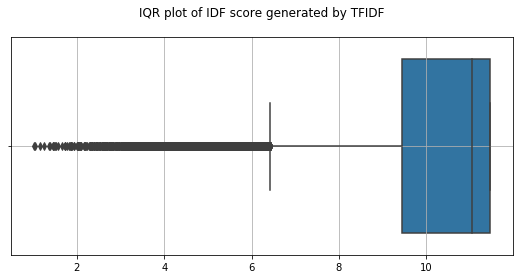

In [78]:
# IQR plot
plt.figure(figsize=(9,4))
sns.boxplot((tf_vect.idf_))
plt.grid()
plt.title("IQR plot of IDF score generated by TFIDF\n")
plt.show()

In [79]:
# 0th , 25th , 50th , 75th , 100th pecentile
for i in range(0,101,25):
    print(f"{i}th percentile: {np.percentile(tf_vect.idf_,i)}")

0th percentile: 1.0077820287056232
25th percentile: 9.447042507065435
50th percentile: 11.056480419499536
75th percentile: 11.4619455276077
100th percentile: 11.4619455276077


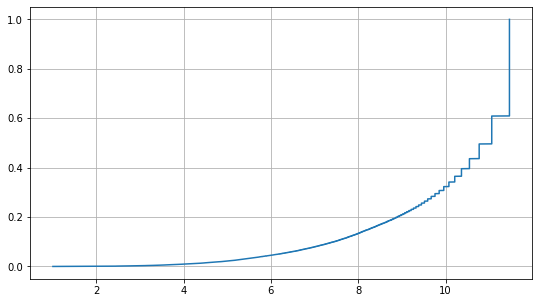

In [80]:
# CDF OF IQR 
plt.figure(figsize=(9,5))
plt.plot(sorted(tf_vect.idf_),(np.arange(len(tf_vect.idf_))/len(tf_vect.idf_)),)
plt.grid()
plt.show()

### 2.3 Removing words with low and high IDF score and choosing vocabulary of IQR range of IDF scorw

In [81]:
# Getting index of vocabulary of IQR range IDF
top_vocab_idx = np.where(tf_vect.idf_>9.44) and  np.where(tf_vect.idf_<11.46)

# Selection of vocabulary
tfidf_vocab = np.array(tf_vect.get_feature_names())

# Final selected vocabulary
selected_vocab = tfidf_vocab[top_vocab_idx]

print("Length of vocab Before removing words: ",(vocab_size_essay))
print("\nLength of vocab after removing words: ",len(selected_vocab))

Length of vocab Before removing words:  47442

Length of vocab after removing words:  28855


### 2.4.preparing essay feature using optimal tf_idf scores

In [82]:
# refer: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

# define documents
train_essay = X_train.essay
cv_essay = X_cv.essay
test_essay = X_test.essay

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(selected_vocab)   ## Using selected words in vocubuary based on IDF score generated by TFIDF vectoriser
vocab_size_essay_selected_idf = len(t.word_index) + 1
# integer encode the documents
train_encoded_essay_selected_idf = t.texts_to_sequences(train_essay)
cv_encoded_essay_selected_idf = t.texts_to_sequences(cv_essay)
test_encoded_essay_selected_idf = t.texts_to_sequences(test_essay)
print(train_encoded_essay_selected_idf)


# pad documents to a max length of words :339 in our case
max_length = max_len_of_sent
train_padded_essay_selected_idf = pad_sequences(train_encoded_essay_selected_idf, maxlen=max_length, padding='post')
cv_padded_essay_selected_idf = pad_sequences(cv_encoded_essay_selected_idf, maxlen=max_length, padding='post')
test_padded_essay_selected_idf = pad_sequences(test_encoded_essay_selected_idf, maxlen=max_length, padding='post')
print(train_padded_essay_selected_idf)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[ 8339  6837 15135 ...     0     0     0]
 [ 2124 24805 10180 ...     0     0     0]
 [17023 24805 26643 ...     0     0     0]
 ...
 [ 1350 25553 15297 ...     0     0     0]
 [17023 14432 27894 ...     0     0     0]
 [19341 28530 18173 ...     0     0     0]]


In [83]:
"""# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.42B.300d.txt',encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()


print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
new_embedding_matrix = zeros((vocab_size_essay_selected_idf, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        new_embedding_matrix[i] = embedding_vector"""

"# load the whole embedding into memory\nembeddings_index = dict()\nf = open('glove.42B.300d.txt',encoding='utf-8')\nfor line in f:\n    values = line.split()\n    word = values[0]\n    coefs = asarray(values[1:], dtype='float32')\n    embeddings_index[word] = coefs\nf.close()\n\n\nprint('Loaded %s word vectors.' % len(embeddings_index))\n# create a weight matrix for words in training docs\nnew_embedding_matrix = zeros((vocab_size_essay_selected_idf, 300))\nfor word, i in t.word_index.items():\n    embedding_vector = embeddings_index.get(word)\n    if embedding_vector is not None:\n        new_embedding_matrix[i] = embedding_vector"

In [84]:
# Saving embedding matrix
"""file = open("new_embedding_matrix",'wb')
np.save(file,new_embedding_matrix)
file.close()"""

with open("new_embedding_matrix",'rb') as f:
    new_embedding_matrix=np.load(f)

### 2.5 Model-2 (same architecture as Model-1)

In [90]:
#initialisation of vocab size and shapes of all input features

# Vocab size of each feature for Embeding Layer
vocab_size_essay_idf = len(selected_vocab)+1  # adding 1 for zero padding index
category_vocab_size = category_vocab_size
sub_category_vocab_size = sub_category_vocab_size
train_school_state_label_encoded_vocab_size = len(np.unique(train_school_state_label_encoded))
train_teacher_prefix_label_encoded_vocab_size = len(np.unique(train_teacher_prefix_label_encoded))
train_grade_label_encoded_vocab_size = len(np.unique(train_grade_label_encoded))

# shapes of input of each feaures for Input Layer
train_padded_essay_shape_idf = train_padded_essay_selected_idf.shape
train_school_state_label_encoded_shape = train_school_state_label_encoded.shape
train_teacher_prefix_label_encoded_shape = train_teacher_prefix_label_encoded.shape
train_grade_label_encoded_shape = train_grade_label_encoded.shape
train_padded_clean_subcategories_shape = train_padded_clean_subcategories.shape
train_padded_clean_categories_shape = train_padded_clean_categories.shape
train_price_shape = X_train['price'].shape
train_teacher_number_of_previously_posted_projects_shape = X_train["teacher_number_of_previously_posted_projects"].shape

In [91]:
# Model 2 using Keras Functional Api

tf.keras.backend.clear_session()

# Eaasy
input1= Input(shape=(train_padded_essay_shape_idf[1],) ,name='essay_input' )

# Essay embed layer using pretrained Glove embedings of 300 dim
Embeded_layer1 = Embedding(vocab_size_essay_idf, output_dim=300, weights=[new_embedding_matrix], input_length=339, trainable=False)(input1)
# Lstm layer for essay
lstm_layer1 = layers.LSTM(units=64,return_sequences=True)(Embeded_layer1)
flatten1 = Flatten()(lstm_layer1)

# school state
input2= Input(shape=(train_school_state_label_encoded_shape[1],) ,name='school_state_input')
Embeded_layer2= Embedding(train_school_state_label_encoded_vocab_size, output_dim=50, input_length=1)(input2)
flatten2 = Flatten()(Embeded_layer2)

# teacher_prefix
input3= Input(shape=(train_teacher_prefix_label_encoded_shape[1],) ,name='teacher_prefix')
Embeded_layer3= Embedding(train_school_state_label_encoded_vocab_size, output_dim=50, input_length=1)(input3)
flatten3 = Flatten()(Embeded_layer3)

# project_grade_category
input4= Input(shape=(train_grade_label_encoded_shape[1],) ,name='project_grade_category')
Embeded_layer4 = Embedding(train_grade_label_encoded_vocab_size, output_dim=50, input_length=1)(input4)
flatten4 = Flatten()(Embeded_layer4)

# clean_subcategories
input5= Input(shape=(train_padded_clean_categories_shape[1],) ,name='clean_categories')
Embeded_layer5 = Embedding(category_vocab_size, output_dim=50, input_length=664)(input5)
flatten5 = Flatten()(Embeded_layer5)

# clean_subcategories
input6= Input(shape=(train_padded_clean_subcategories_shape[1],) ,name='clean_subcategories')
Embeded_layer6 = Embedding(sub_category_vocab_size, output_dim=50, input_length=3)(input6)
flatten6 = Flatten()(Embeded_layer6)

input7 = Input(shape=(1,) ,name='price')
input8 = Input(shape=(1,) ,name='teacher_number_of_previously_posted_projects')
input9 = Input(shape=(1,) ,name='quantity')
input10 = Input(shape=(1,) ,name='presence_of_num')

concat_input_7_8_9_10 = concatenate([input7,input8,input9,input10], name='concat_input7_input8')
dense1 = Dense(32,activation='relu',kernel_initializer='he_uniform')(concat_input_7_8_9_10)

# Concatenation of all output of previous layers
concatenate2 = concatenate([flatten1,flatten2,flatten3,flatten4,flatten5,dense1], name="concat_all_output")

# Dense layer 2 after concatenation of all output
dense_layer2 = Dense(units=128 ,activation='relu' ,kernel_initializer='he_uniform')(concatenate2)
dropout1=Dropout(rate=0.2)(dense_layer2)
batch_normalize1 = layers.BatchNormalization()(dropout1)


# Dense layer 3 after concatenation of all output
dense_layer3 = Dense(units=128 ,activation='relu' ,kernel_initializer='he_uniform')(batch_normalize1)
dropout2 = Dropout(rate=0.2)(dense_layer3)
batch_normalize2=layers.BatchNormalization()(dropout2)


# Dense layer 3 after concatenation of all output
dense_layer4 = Dense(units=64 ,activation='relu' ,kernel_initializer='he_uniform')(batch_normalize2)
dropout2 = Dropout(rate=0.2)(dense_layer4)

#output
output = Dense(units=2 ,activation='softmax' ,kernel_initializer='glorot_uniform', name="output_layer")(dropout2)

Model2 = Model(inputs=[input1,input2,input3,input4,input5,input6,input7,input8,input9,input10], outputs=output)
print(Model2.summary())


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        [(None, 331)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 331, 300)     8656800     essay_input[0][0]                
__________________________________________________________________________________________________
school_state_input (InputLayer) [(None, 1)]          0                                            
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     [(None, 1)]          0                                            
______________________________________________________________________________________________

In [92]:

train=[train_padded_essay_selected_idf,train_school_state_label_encoded,train_teacher_prefix_label_encoded,train_grade_label_encoded,train_padded_clean_categories,
       train_padded_clean_subcategories,X_train["price"],X_train["teacher_number_of_previously_posted_projects"],X_train['quantity'],
       X_train['presence_of_number_in_description']]

cv = [cv_padded_essay_selected_idf,cv_school_state_label_encoded,cv_teacher_prefix_label_encoded,cv_grade_label_encoded,cv_padded_clean_categories,
      cv_padded_clean_subcategories,X_cv["price"],X_cv["teacher_number_of_previously_posted_projects"],X_cv['quantity'],
      X_cv['presence_of_number_in_description']]

test = [test_padded_essay_selected_idf,test_school_state_label_encoded,test_teacher_prefix_label_encoded,test_grade_label_encoded,test_padded_clean_categories,
        test_padded_clean_subcategories,X_test["price"],X_test["teacher_number_of_previously_posted_projects"],X_test['quantity'],
        X_test['presence_of_number_in_description']]


### 2.6 Traning

In [93]:
# Traning using Model-2
    
# defining custom ROC AUC for keras ,refer: https://stackoverflow.com/a/51734992
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.compat.v1.py_func(roc_auc_score, (y_true, y_pred), tf.double)

# Checkpoint callbacks
check_point = ModelCheckpoint(
    filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',
    monitor='val_auroc',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    period=10)

# Load the TensorBoard notebook extension
logs_base_dir = ".\logs"
os.makedirs(logs_base_dir, exist_ok=True)
logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir)

# Early Stopper callback
e_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_auroc',
                              min_delta=0,
                              patience=10,
                              verbose=1, mode='max',restore_best_weights=True)

Model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
Model2.fit(x=train, y=y_train,
           batch_size=128,
           epochs=150,
           validation_data=(cv, y_cv),
           callbacks=[check_point,tensorboard_callback,e_stopper],
           verbose=2,                   
           )

Train on 69918 samples, validate on 21850 samples
Epoch 1/150
69918/69918 - 29s - loss: 0.4489 - auroc: 0.6156 - val_loss: 0.3945 - val_auroc: 0.7125
Epoch 2/150
69918/69918 - 28s - loss: 0.3852 - auroc: 0.7236 - val_loss: 0.3788 - val_auroc: 0.7520
Epoch 3/150
69918/69918 - 28s - loss: 0.3709 - auroc: 0.7493 - val_loss: 0.3652 - val_auroc: 0.7576
Epoch 4/150
69918/69918 - 28s - loss: 0.3637 - auroc: 0.7619 - val_loss: 0.3660 - val_auroc: 0.7526
Epoch 5/150
69918/69918 - 28s - loss: 0.3580 - auroc: 0.7725 - val_loss: 0.3583 - val_auroc: 0.7666
Epoch 6/150
69918/69918 - 28s - loss: 0.3509 - auroc: 0.7846 - val_loss: 0.3643 - val_auroc: 0.7704
Epoch 7/150
69918/69918 - 28s - loss: 0.3405 - auroc: 0.8012 - val_loss: 0.3626 - val_auroc: 0.7607
Epoch 8/150
69918/69918 - 28s - loss: 0.3295 - auroc: 0.8173 - val_loss: 0.3729 - val_auroc: 0.7560
Epoch 9/150
69918/69918 - 28s - loss: 0.3121 - auroc: 0.8388 - val_loss: 0.3744 - val_auroc: 0.7464
Epoch 10/150

Epoch 00010: val_auroc improved from

### 2.7 Saving the weights and Evaluation

In [94]:
# refer: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

# Saving the model weights
Model2.save_weights("model2.h5")
print("Saved model to disk")

# Loading Model and weights
Model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
Model2.load_weights("model2.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


#### Evalution using keras custom roc auc

In [95]:
# evaluate loaded model on test data   
train_score = Model2.evaluate(train,y_train, verbose=2,batch_size=(128))
print(f"train {Model2.metrics_names[1]}:  {train_score[1]}\n")

cv_score = Model2.evaluate(cv,y_cv, verbose=2,batch_size=(128))
print(f"cv {Model2.metrics_names[1]}:  {cv_score[1]}\n")

test_score = Model2.evaluate(test,y_test, verbose=2,batch_size=(128))
print(f"test {Model2.metrics_names[1]}:  {test_score[1]}\n")

69918/69918 - 17s - loss: 0.3425 - auroc: 0.8100
train auroc:  0.8099930882453918

21850/21850 - 5s - loss: 0.3643 - auroc: 0.7715
cv auroc:  0.7715215682983398

17480/17480 - 4s - loss: 0.3690 - auroc: 0.7659
test auroc:  0.7659369707107544



#### Evalution using direct sklearn roc auc

In [96]:
# sklearn ROC AUC
train_score = Model2.predict(train)
print(f"Train {Model2.metrics_names[1]}:  {sklearn_roc(y_train,train_score)}\n")

cv_score = Model2.predict(cv)
print(f"Cv {Model2.metrics_names[1]}:  {sklearn_roc(y_cv,cv_score)}\n")

test_score = Model2.predict(test)
print(f"test {Model2.metrics_names[1]}:  {sklearn_roc(y_test,test_score)}\n")


Train auroc:  0.7405537303896463

Cv auroc:  0.7023508486906042

test auroc:  0.7015559231611674



# 3. Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

### 3.0 For Essay feature using the same embedding which is used in Model-2

### 3.1. Preparing school_state data for training 

In [97]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
train_school_state_label_encoded_oh = ohe.fit_transform(np.array(X_train.school_state).reshape(-1,1))
cv_school_state_label_encoded_oh = ohe.transform(np.array(X_cv.school_state).reshape(-1,1))
test_school_state_label_encoded_oh = ohe.transform(np.array(X_test.school_state).reshape(-1,1))

print("number of Unique categories in School State feature :",len(np.unique(ohe.categories_)))
print(test_school_state_label_encoded_oh)

number of Unique categories in School State feature : 51
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 3.2 Preparing teacher_prefix data for training

In [98]:
ohe = OneHotEncoder(sparse=False)
train_teacher_prefix_label_encoded_oh = ohe.fit_transform(np.array(X_train.teacher_prefix).reshape(-1,1))
cv_teacher_prefix_label_encoded_oh = ohe.transform(np.array(X_cv.teacher_prefix).reshape(-1,1))
test_teacher_prefix_label_encoded_oh = ohe.transform(np.array(X_test.teacher_prefix).reshape(-1,1))

print("number of Unique categories in teacher_prefix feature :",len(np.unique(ohe.categories_)))
print(f"\nbefore: \n{X_test.teacher_prefix.iloc[:5]}\n")
print(f"after: \n{test_teacher_prefix_label_encoded_oh[:5]}")

number of Unique categories in teacher_prefix feature : 5

before: 
73624     ms
2158     mrs
74759    mrs
89804    mrs
18127    mrs
Name: teacher_prefix, dtype: object

after: 
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


### 3.3 Preparing project_grade_category data for training

In [99]:
ohe = OneHotEncoder(sparse=False)
train_grade_label_encoded_oh = ohe.fit_transform(np.array(X_train.project_grade_category).reshape(-1,1))
cv_grade_label_encoded_oh = ohe.transform(np.array(X_cv.project_grade_category).reshape(-1,1))
test_grade_label_encoded_oh = ohe.transform(np.array(X_test.project_grade_category).reshape(-1,1))

print("number of Unique categories in project_grade_category feature :",len(np.unique(ohe.categories_)))
print(f"\nbefore: \n{X_test.project_grade_category.iloc[:5]}\n")
print(f"after: \n{test_grade_label_encoded_oh[:5]}")

number of Unique categories in project_grade_category feature : 4

before: 
73624    grades_prek_2
2158     grades_prek_2
74759    grades_prek_2
89804       grades_3_5
18127    grades_prek_2
Name: project_grade_category, dtype: object

after: 
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


### 3.4. Preparing clean_categories data for training

In [100]:
ohe = OneHotEncoder(sparse=False)
train_encoded_clean_categories_oh = ohe.fit_transform(np.array(X_train.clean_categories).reshape(-1,1))
cv_encoded_clean_categories_oh = ohe.transform(np.array(X_cv.clean_categories).reshape(-1,1))
test_encoded_clean_categories_oh = ohe.transform(np.array(X_test.clean_categories).reshape(-1,1))

print("number of Unique clean_categories in teacher_prefix feature :",len(np.unique(ohe.categories_)))
print(f"\nbefore: \n{X_test.clean_categories.iloc[:5]}\n")
print(f"after: \n{test_encoded_clean_categories_oh[:5]}")



number of Unique clean_categories in teacher_prefix feature : 51

before: 
73624                 literacy_language
2158     literacy_language math_science
74759                 literacy_language
89804                 literacy_language
18127                   appliedlearning
Name: clean_categories, dtype: object

after: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

### 3.5. Preparing clean_subcategories data for training

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect =CountVectorizer()
train_encoded_clean_subcategories_oh = count_vect.fit_transform((X_train.clean_subcategories)).toarray()
cv_encoded_clean_subcategories_oh = count_vect.transform((X_cv.clean_subcategories)).toarray()
test_encoded_clean_subcategories_oh = count_vect.transform((X_test.clean_subcategories)).toarray()

print("number of Unique categories in clean_subcategories feature :",len(np.unique(count_vect.get_feature_names())))
print(f"\nbefore: \n{X_test.clean_subcategories.iloc[:5]}\n")
print(f"after: \n{test_encoded_clean_subcategories_oh[:5]}")

number of Unique categories in clean_subcategories feature : 30

before: 
73624                literacy
2158     literacy mathematics
74759                literacy
89804      literature_writing
18127        earlydevelopment
Name: clean_subcategories, dtype: object

after: 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### 3.6 Training using Model-3

In [103]:
#initialisation of vocab size and shapes of all input features

# Vocab size of each feature for Embeding Layer
vocab_size_essay_idf = len(selected_vocab)+1  # adding 1 for zero padding index

# shapes of input of each feaures for Input Layer
train_padded_essay_shape = train_padded_essay_selected_idf.shape
train_school_state_label_encoded_shape = train_school_state_label_encoded_oh.shape
train_teacher_prefix_label_encoded_shape = train_teacher_prefix_label_encoded_oh.shape
train_grade_label_encoded_shape = train_grade_label_encoded_oh.shape
train_padded_clean_subcategories_shape = train_encoded_clean_subcategories_oh.shape
train_padded_clean_categories_shape = train_encoded_clean_categories_oh.shape
train_price_shape = X_train['price'].shape
train_teacher_number_of_previously_posted_projects_shape = X_train["teacher_number_of_previously_posted_projects"].shape

#### Model 3

In [109]:
# Model 3 using Keras Functional Api
tf.keras.backend.clear_session()

# Eaasy
input1= Input(shape=(train_padded_essay_shape[1],) ,name='essay_input' )
# Essay embed layer using pretrained Glove embedings of 300 dim
Embeded_layer1 = Embedding(vocab_size_essay_idf, output_dim=300, weights=[new_embedding_matrix], input_length=339, trainable=False)(input1)
# Lstm layer for essay
lstm_layer1 = (layers.LSTM(units=64,return_sequences=True,dropout=0.2))(Embeded_layer1)
flatten1 = Flatten()(lstm_layer1)

# school state
input2= Input(shape=(train_school_state_label_encoded_shape[1],) ,name='school_state_input')

# teacher_prefix
input3= Input(shape=(train_teacher_prefix_label_encoded_shape[1],) ,name='teacher_prefix')

# project_grade_category
input4= Input(shape=(train_grade_label_encoded_shape[1],) ,name='project_grade_category')

# clean_subcategories
input5= Input(shape=(train_padded_clean_categories_shape[1],) ,name='clean_categories')

# clean_subcategories
input6= Input(shape=(train_padded_clean_subcategories_shape[1],) ,name='clean_subcategories')

# price
input7 = Input(shape=(1,) ,name='price')

# teacher_number_of_previously_posted_projects
input8 = Input(shape=(1,) ,name='teacher_number_of_previously_posted_projects')

# mean quantity
input9 = Input(shape=(1,) ,name='quantity')

# presence_of_num 
input10 = Input(shape=(1,) ,name='presence_of_num')

# Concatenation of all inputs ecxept essay feature
concat_other_than_essay = layers.concatenate([input2,input3,input4,input5,input6,input7,input8,input9,input10],name='concat_other_than_essay')
print(concat_other_than_essay.shape)
concat_other_than_essay =  layers.Reshape([145,1])(concat_other_than_essay)


# Convolution 1-D on concatenated feature 
convolution1=layers.Conv1D(filters=256,
              kernel_size=3,
              strides=1,
              padding='valid',
              activation='relu',
              kernel_initializer='glorot_uniform',name='Convolution_layer_1')(concat_other_than_essay)
# Maxpool layer 1
maxpool1 = layers.MaxPool1D(pool_size=3)(convolution1)

# Convolution layer 2
convolution2=layers.Convolution1D(filters=128,
              kernel_size=3,
              strides=1,
              padding='valid',
              activation='relu',
              kernel_initializer='glorot_uniform',name='Convolution_layer_2')(maxpool1)
# Maxpool layer 2
maxpool2 = layers.MaxPool1D(pool_size=3)(convolution2)
# Flatten the output of final convolution layer
flatten2 = Flatten()(maxpool2)

# Concat fllaten LSTM of essay and flatten Convolution of other_than_essay_feature
Contat2 = layers.concatenate([flatten1,flatten2], name='concat_all_features')

# Train Dense on concatenation of all feat (concat2)
dense1 = Dense(128,activation='relu',kernel_initializer='he_uniform')(Contat2)
dropout1 = Dropout(rate=0.5)(dense1)

# Dense layer 2 after concatenation of all output
dense_layer2 = Dense(units=64 ,activation='relu' ,kernel_initializer='he_uniform')(dropout1)
dropout2 = Dropout(rate=0.5)(dense_layer2)

# Dense layer 3 after concatenation of all output
dense_layer3 = Dense(units=64 ,activation='relu' ,kernel_initializer='he_uniform')(dropout2)

#output
output = Dense(units=2 ,activation='softmax' ,kernel_initializer='glorot_uniform', name="output_layer")(dense_layer3)

Model3 = Model(inputs=[input1,input2,input3,input4,input5,input6,input7,input8,input9,input10], outputs=output)
print(Model3.summary())

(None, 145)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
school_state_input (InputLayer) [(None, 51)]         0                                            
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     [(None, 5)]          0                                            
__________________________________________________________________________________________________
project_grade_category (InputLa [(None, 4)]          0                                            
__________________________________________________________________________________________________
clean_categories (InputLayer)   [(None, 51)]         0                                            
__________________________________________________________________________________

In [110]:

train=[train_padded_essay_selected_idf,train_school_state_label_encoded_oh,train_teacher_prefix_label_encoded_oh,train_grade_label_encoded_oh,
       train_encoded_clean_categories_oh,train_encoded_clean_subcategories_oh,X_train["price"],X_train["teacher_number_of_previously_posted_projects"],
       X_train['quantity'],X_train['presence_of_number_in_description']]

cv = [cv_padded_essay_selected_idf,cv_school_state_label_encoded_oh,cv_teacher_prefix_label_encoded_oh,cv_grade_label_encoded_oh,
      cv_encoded_clean_categories_oh,cv_encoded_clean_subcategories_oh,X_cv["price"],X_cv["teacher_number_of_previously_posted_projects"],
      X_cv['quantity'],X_cv['presence_of_number_in_description']]

test = [test_padded_essay_selected_idf,test_school_state_label_encoded_oh,test_teacher_prefix_label_encoded_oh,test_grade_label_encoded_oh,
        test_encoded_clean_categories_oh,test_encoded_clean_subcategories_oh,X_test["price"],X_test["teacher_number_of_previously_posted_projects"],
        X_test['quantity'],X_test['presence_of_number_in_description']]


### 3.7 Training

In [111]:
# Traning using Model-3

# defining custom ROC AUC for keras ,refer: https://stackoverflow.com/a/51734992
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.compat.v1.py_func(roc_auc_score, (y_true, y_pred), tf.double)

# Checkpoint callbacks
check_point = ModelCheckpoint(
    filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',
    monitor='val_auroc',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    period=10)

# TensorBoard 
logs_base_dir = ".\logs"
os.makedirs(logs_base_dir, exist_ok=True)
logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir)

# Early Stopper callback
e_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_auroc',
                              min_delta=0,
                              patience=10,
                              verbose=1, mode='max',restore_best_weights=True,)

Model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=[auroc])
Model3.fit(x=train, y=y_train,
           batch_size=256,
           epochs=150,
           validation_data=(cv, y_cv),
           callbacks=[check_point, tensorboard_callback, e_stopper],
           verbose=2,                   
           )

Train on 69918 samples, validate on 21850 samples
Epoch 1/150
69918/69918 - 25s - loss: 0.4373 - auroc: 0.6435 - val_loss: 0.3935 - val_auroc: 0.7289
Epoch 2/150
69918/69918 - 21s - loss: 0.3888 - auroc: 0.7232 - val_loss: 0.4031 - val_auroc: 0.7430
Epoch 3/150
69918/69918 - 21s - loss: 0.3729 - auroc: 0.7509 - val_loss: 0.3968 - val_auroc: 0.7491
Epoch 4/150
69918/69918 - 21s - loss: 0.3616 - auroc: 0.7743 - val_loss: 0.3770 - val_auroc: 0.7518
Epoch 5/150
69918/69918 - 21s - loss: 0.3441 - auroc: 0.8003 - val_loss: 0.3793 - val_auroc: 0.7477
Epoch 6/150
69918/69918 - 21s - loss: 0.3228 - auroc: 0.8295 - val_loss: 0.3823 - val_auroc: 0.7371
Epoch 7/150
69918/69918 - 21s - loss: 0.2920 - auroc: 0.8645 - val_loss: 0.3819 - val_auroc: 0.7306
Epoch 8/150
69918/69918 - 21s - loss: 0.2642 - auroc: 0.8937 - val_loss: 0.3972 - val_auroc: 0.7211
Epoch 9/150
69918/69918 - 21s - loss: 0.2326 - auroc: 0.9182 - val_loss: 0.4049 - val_auroc: 0.7189
Epoch 10/150

Epoch 00010: val_auroc improved from

### 2.7 Saving the weights and Evaluation

In [112]:
# refer: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

# Saving the model weights
Model3.save_weights("model3.h5")
print("Saved model to disk")

# Loading Model and weights
Model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
Model3.load_weights("model3.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


#### Evalution using keras custom roc auc

In [113]:
# evaluate loaded model on test data   
train_score = Model3.evaluate(train,y_train, verbose=2,batch_size=(128))
print(f"train {Model3.metrics_names[1]}:  {train_score[1]}\n")

cv_score = Model3.evaluate(cv,y_cv, verbose=2,batch_size=(128))
print(f"cv {Model3.metrics_names[1]}:  {cv_score[1]}\n")

test_score = Model3.evaluate(test,y_test, verbose=2,batch_size=(128))
print(f"test {Model3.metrics_names[1]}:  {test_score[1]}\n")

69918/69918 - 18s - loss: 0.3478 - auroc: 0.8349
train auroc:  0.8349214792251587

21850/21850 - 5s - loss: 0.3770 - auroc: 0.7528
cv auroc:  0.752826988697052

17480/17480 - 4s - loss: 0.3807 - auroc: 0.7430
test auroc:  0.7430437207221985



#### Evalution using direct sklearn roc auc

In [114]:
# sklearn ROC AUC
train_score = Model3.predict(train)
print(f"Train {Model3.metrics_names[1]}:  {sklearn_roc(y_train,train_score)}\n")

cv_score = Model3.predict(cv)
print(f"Cv {Model3.metrics_names[1]}:  {sklearn_roc(y_cv,cv_score)}\n")

test_score = Model3.predict(test)
print(f"test {Model3.metrics_names[1]}:  {sklearn_roc(y_test,test_score)}\n")


Train auroc:  0.844925395892924

Cv auroc:  0.7609313680046971

test auroc:  0.7416349716749208



# 4.Result

In [23]:
%load_ext tensorboard
# Start TENSORBOARD
"""!del /q %TMP%\.tensorboard-info\*""" # Execute in case of 'localhost refused to connect'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'!del /q %TMP%\\.tensorboard-info\\*'

In [22]:
"""%tensorboard --logdir {'logs'}  --host localhost """

"%tensorboard --logdir {'logs'}  --host localhost "

### 4.1 EPOCH  AUROC graph from tensorboard

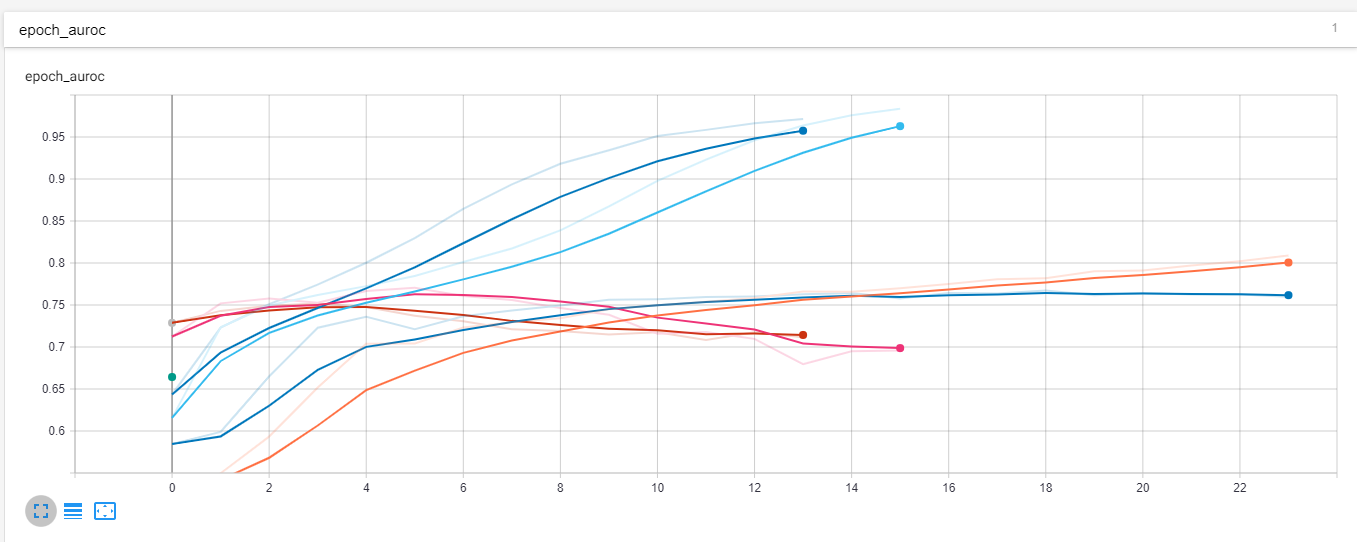

In [14]:
from IPython.display import Image
Image("epoch auroc.png")

### 4.2 EPOCH Loss graph

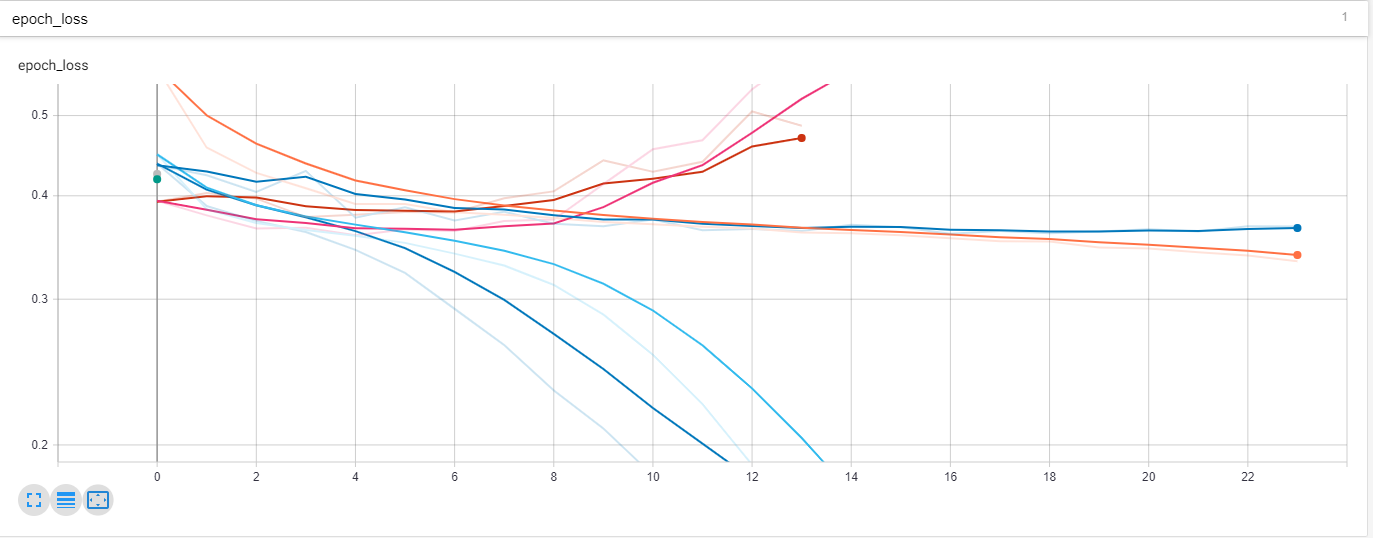

In [18]:
from IPython.display import Image
Image("epoch loss.png")

### 4.3 Pretty Table

In [6]:
from prettytable import PrettyTable
x=PrettyTable(field_names=["Model","train_roc_auc","cv_roc_auc","test_roc_auc"])
x.add_row(["Model1",0.780,0.757,0.750])
x.add_row(["Model2",0.740,0.702,0.701])
x.add_row(["Model3",0.844,0.760,0.741])
print(x)

+--------+---------------+------------+--------------+
| Model  | train_roc_auc | cv_roc_auc | test_roc_auc |
+--------+---------------+------------+--------------+
| Model1 |      0.78     |   0.757    |     0.75     |
| Model2 |      0.74     |   0.702    |    0.701     |
| Model3 |     0.844     |    0.76    |    0.741     |
+--------+---------------+------------+--------------+


END:)